In [1]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

In [2]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

In [3]:
ma5 = '/home/phylab/hepwork/madanalysis5'

##################### SM LO ######################
xsec_run23 = 1468.562; nevent_run23 = 500000  
xsec_run24 = 1673.278; nevent_run24 = 500000
xsec_run25 = 27.5701;  nevent_run25 = 500000
xsec_run26 = 110.256;  nevent_run26 = 500000
xsec_run27 = 1673.789; nevent_run27 = 500000
xsec_run28 = 15.9264;  nevent_run28 = 500000
xsec_run29 = 12.7315;  nevent_run29 = 1000000
xsec_run30 = 5.7572;   nevent_run30 = 1000000
xsec_tot = (xsec_run23*nevent_run23 + xsec_run24*nevent_run24 + xsec_run25*nevent_run25 + xsec_run26*nevent_run26 + xsec_run27*nevent_run27 + xsec_run28*nevent_run28 + xsec_run29*nevent_run29 + xsec_run30*nevent_run30)/(nevent_run23+nevent_run24+nevent_run25+nevent_run26+nevent_run27+nevent_run28+nevent_run29+nevent_run30)
SM_LO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_Mll50and200/MadAnalysis5job_2/Cutflows',xsection=xsec_tot,lumi= 300.)
SM_LO_RapNo_sumw   = (SM_LO['Rap_No'][0].sumw)
SM_LO_Rap00_sumw   = (SM_LO['Rap_00'][0].sumw)
SM_LO_Rap01_sumw   = (SM_LO['Rap_01'][0].sumw)
SM_LO_Rap02_sumw   = (SM_LO['Rap_02'][0].sumw)
SM_LO_Rap04_sumw   = (SM_LO['Rap_04'][0].sumw)
SM_LO_Rap06_sumw   = (SM_LO['Rap_06'][0].sumw)
SM_LO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_Mll50and200/MadAnalysis5job_2/Histograms/histos.saf')

############################## SM NLO #####################################
xsec_run05 = 1.562334e+03; nevent_run05 = 500000  
xsec_run06 = 1.915643e+03; nevent_run06 = 500000
xsec_run07 = 3.340220e+01; nevent_run07 = 500000
xsec_run08 = 1.966787e+01; nevent_run08 = 500000
xsec_run09 = 4.002559e+00; nevent_run09 = 500000
xsec_run10 = 1.569808e+01; nevent_run10 = 500000
xsec_run11 = 1.170127e+02; nevent_run11 = 500000
xsec_run12 = 1.284889e+01; nevent_run12 = 500000
xsec_run13 = 1.281762e+01; nevent_run13 = 500000
xsec_run14 = 1.260190e+01; nevent_run14 = 500000
xsec_run15 = 1.258034e+01; nevent_run15 = 500000
xsec_run16 = 1.047e+00;    nevent_run16 = 500000
xsec_run17 = 8.564965e+00; nevent_run17 = 800000
xsec_run18 = 2.556382e+00; nevent_run18 = 500000
xsec_tot = (xsec_run05*nevent_run05 + xsec_run06*nevent_run06 + xsec_run07*nevent_run07 + xsec_run08*nevent_run08 + xsec_run09*nevent_run09 + xsec_run10*nevent_run10 + xsec_run11*nevent_run11 + xsec_run12*nevent_run12 + xsec_run13*nevent_run13 + xsec_run14*nevent_run14 + xsec_run15*nevent_run15 + xsec_run16*nevent_run16 + xsec_run17*nevent_run17 + xsec_run18*nevent_run18)/(nevent_run05+nevent_run06+nevent_run07+nevent_run08+nevent_run09+nevent_run10+nevent_run11+nevent_run12+nevent_run13+nevent_run14+nevent_run15+nevent_run16+nevent_run17+nevent_run18)
SM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO_Mll50and200/MadAnalysis5job_5/Cutflows',xsection=xsec_tot, lumi= 300.)
SM_NLO_RapNo_sumw   = (SM_NLO['Rap_No'][0].sumw)
SM_NLO_Rap00_sumw   = (SM_NLO['Rap_00'][0].sumw)
SM_NLO_Rap01_sumw   = (SM_NLO['Rap_01'][0].sumw)
SM_NLO_Rap02_sumw   = (SM_NLO['Rap_02'][0].sumw)
SM_NLO_Rap04_sumw   = (SM_NLO['Rap_04'][0].sumw)
SM_NLO_Rap06_sumw   = (SM_NLO['Rap_06'][0].sumw)
SM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO_Mll50and200/MadAnalysis5job_5/Histograms/histos.saf')

In [4]:
""""
############################## SM NLO #####################################
xsec_run05 = 1.562334e+03; nevent_run05 = 500000  
xsec_run06 = 1.915643e+03; nevent_run06 = 500000
xsec_run07 = 3.340220e+01; nevent_run07 = 500000
xsec_run08 = 1.966787e+01; nevent_run08 = 500000
xsec_run09 = 4.002559e+00; nevent_run09 = 500000
xsec_run10 = 1.569808e+01; nevent_run10 = 500000
xsec_run11 = 1.170127e+02; nevent_run11 = 500000
xsec_run12 = 1.284889e+01; nevent_run12 = 500000
xsec_run13 = 1.281762e+01; nevent_run13 = 500000
xsec_run14 = 1.260190e+01; nevent_run14 = 500000
xsec_run15 = 1.258034e+01; nevent_run15 = 500000
xsec_run16 = 1.047e+00;    nevent_run16 = 500000
xsec_run17 = 8.564965e+00;    nevent_run17 = 800000
xsec_tot = (xsec_run05*nevent_run05 + xsec_run06*nevent_run06 + xsec_run07*nevent_run07 + xsec_run08*nevent_run08 + xsec_run09*nevent_run09 + xsec_run10*nevent_run10 + xsec_run11*nevent_run11 + xsec_run12*nevent_run12 + xsec_run13*nevent_run13 + xsec_run14*nevent_run14 + xsec_run15*nevent_run15 + xsec_run16*nevent_run16 + xsec_run17*nevent_run17)/(nevent_run05+nevent_run06+nevent_run07+nevent_run08+nevent_run09+nevent_run10+nevent_run11+nevent_run12+nevent_run13+nevent_run14+nevent_run15+nevent_run16+nevent_run17)
SSM_LO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO_Mll50and200/MadAnalysis5job_0/Cutflows',xsection=xsec_tot, lumi= 300.)
SSM_LO_RapNo_sumw   = (SSM_LO['Rap_No'][0].sumw)
SSM_LO_Rap00_sumw   = (SSM_LO['Rap_00'][0].sumw)
SSM_LO_Rap01_sumw   = (SSM_LO['Rap_01'][0].sumw)
SSM_LO_Rap02_sumw   = (SSM_LO['Rap_02'][0].sumw)
SSM_LO_Rap04_sumw   = (SSM_LO['Rap_04'][0].sumw)
SSM_LO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO_Mll50and200/MadAnalysis5job_0/Histograms/histos.saf')
"""

'"\n############################## SM NLO #####################################\nxsec_run05 = 1.562334e+03; nevent_run05 = 500000  \nxsec_run06 = 1.915643e+03; nevent_run06 = 500000\nxsec_run07 = 3.340220e+01; nevent_run07 = 500000\nxsec_run08 = 1.966787e+01; nevent_run08 = 500000\nxsec_run09 = 4.002559e+00; nevent_run09 = 500000\nxsec_run10 = 1.569808e+01; nevent_run10 = 500000\nxsec_run11 = 1.170127e+02; nevent_run11 = 500000\nxsec_run12 = 1.284889e+01; nevent_run12 = 500000\nxsec_run13 = 1.281762e+01; nevent_run13 = 500000\nxsec_run14 = 1.260190e+01; nevent_run14 = 500000\nxsec_run15 = 1.258034e+01; nevent_run15 = 500000\nxsec_run16 = 1.047e+00;    nevent_run16 = 500000\nxsec_run17 = 8.564965e+00;    nevent_run17 = 800000\nxsec_tot = (xsec_run05*nevent_run05 + xsec_run06*nevent_run06 + xsec_run07*nevent_run07 + xsec_run08*nevent_run08 + xsec_run09*nevent_run09 + xsec_run10*nevent_run10 + xsec_run11*nevent_run11 + xsec_run12*nevent_run12 + xsec_run13*nevent_run13 + xsec_run14*nevent_

In [5]:
""""
############################## Sequential SM ##############################
SSM_LO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+'/SSM_Zptoll/Output/SAF/BSMtoll/BSMtoll.saf',
                    lumi           = 300.)
SSM_LO_RapNo_sumw   = (SSM_LO['Rap_No'][0].sumw)
SSM_LO_Rap00_sumw   = (SSM_LO['Rap_00'][0].sumw)
SSM_LO_Rap01_sumw   = (SSM_LO['Rap_01'][0].sumw)
SSM_LO_Rap02_sumw   = (SSM_LO['Rap_02'][0].sumw)
SSM_LO_Rap04_sumw   = (SSM_LO['Rap_04'][0].sumw)
SSM_LO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll/MadAnalysis5job_0/Histograms/histos.saf')

############################## Sequential SM NLO (Only Z')##############################
xsec_run01 = 3.231871e-03; nevent_run01 = 200000  
xsec_run02 = 3.234041e-03; nevent_run02 = 100000
xsec_run03 = 3.237111e-03; nevent_run03 = 500000
xsec_run04 = 3.239792e-03; nevent_run04 = 600000
xsec_tot = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02 + xsec_run03*nevent_run03 + xsec_run04*nevent_run04)/(nevent_run01+nevent_run02+nevent_run03+nevent_run04)
SSM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Cutflows',xsection=xsec_tot, lumi= 300.)
SSM_NLO_RapNo_sumw   = (SSM_NLO['Rap_No'][0].sumw)
SSM_NLO_Rap00_sumw   = (SSM_NLO['Rap_00'][0].sumw)
SSM_NLO_Rap01_sumw   = (SSM_NLO['Rap_01'][0].sumw)
SSM_NLO_Rap02_sumw   = (SSM_NLO['Rap_02'][0].sumw)
SSM_NLO_Rap04_sumw   = (SSM_NLO['Rap_04'][0].sumw)
SSM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Histograms/histos.saf')

############################## Interference between SM and Sequential SM @LO #############
xsec_run01 = -1.237357e-04; nevent_run01 = 200000  
xsec_run02 = -9.068639e-05; nevent_run02 = 196726
xsec_tot = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02)/(nevent_run01+nevent_run02)
Inter_SMvsSSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMtoll_LO_Interference/MadAnalysis5job_0/Cutflows', xsection=xsec_tot, lumi= 300.)
Inter_SMvsSSM_RapNo_sumw   = (Inter_SMvsSSM['Rap_No'][0].sumw)
Inter_SMvsSSM_Rap00_sumw   = (Inter_SMvsSSM['Rap_00'][0].sumw)
Inter_SMvsSSM_Rap01_sumw   = (Inter_SMvsSSM['Rap_01'][0].sumw)
Inter_SMvsSSM_Rap02_sumw   = (Inter_SMvsSSM['Rap_02'][0].sumw)
Inter_SMvsSSM_Rap04_sumw   = (Inter_SMvsSSM['Rap_04'][0].sumw)
Inter_SMvsSSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SSMtoll_LO_Interference/MadAnalysis5job_0/Histograms/histos.saf')
"""

'"\n############################## Sequential SM ##############################\nSSM_LO = Collection(collection_path= ma5+\'/SSM_Zptoll/Output/SAF/BSMtoll/MadAnalysis5job_0/Cutflows\',\n                    saf_file       = ma5+\'/SSM_Zptoll/Output/SAF/BSMtoll/BSMtoll.saf\',\n                    lumi           = 300.)\nSSM_LO_RapNo_sumw   = (SSM_LO[\'Rap_No\'][0].sumw)\nSSM_LO_Rap00_sumw   = (SSM_LO[\'Rap_00\'][0].sumw)\nSSM_LO_Rap01_sumw   = (SSM_LO[\'Rap_01\'][0].sumw)\nSSM_LO_Rap02_sumw   = (SSM_LO[\'Rap_02\'][0].sumw)\nSSM_LO_Rap04_sumw   = (SSM_LO[\'Rap_04\'][0].sumw)\nSSM_LO_histos = df(ma5+\'/SSM_Zptoll/Output/SAF/BSMtoll/MadAnalysis5job_0/Histograms/histos.saf\')\n\n############################## Sequential SM NLO (Only Z\')##############################\nxsec_run01 = 3.231871e-03; nevent_run01 = 200000  \nxsec_run02 = 3.234041e-03; nevent_run02 = 100000\nxsec_run03 = 3.237111e-03; nevent_run03 = 500000\nxsec_run04 = 3.239792e-03; nevent_run04 = 600000\nxsec_tot = (xsec_run01*ne

In [6]:
#from CutFlowTable import CutFlowTable
#out =open('Comparison_LOvsNLO.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','SM @LO using NLO pac']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

In [7]:
lumi=300.

bins = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binMax)]
bins_Rap00 = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_00'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].binMax)]

In [8]:
########### Standard Model @LO ########################

########### SM @LO AFB [ETA(l- > 0)] ##################

SM_LO_AFBp_RapNo = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SM_LO.xsec/SM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap00 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap01 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap02 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap04 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_04'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap04_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap06 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_06'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_06'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap06_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SM @LO AFB [ETA(l- < 0)] ##################

SM_LO_AFBm_RapNo = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SM_LO.xsec/SM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap00 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap01 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap02 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap04 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_04'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap04_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap06 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_06'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_06'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap06_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SM_LO_AFBnum_RapNo = SM_LO_AFBp_RapNo[0] - SM_LO_AFBm_RapNo[0]
SM_LO_AFBden_RapNo = SM_LO_AFBp_RapNo[0] + SM_LO_AFBm_RapNo[0]

SM_LO_AFBnum_Rap00 = SM_LO_AFBp_Rap00[0] - SM_LO_AFBm_Rap00[0]
SM_LO_AFBden_Rap00 = SM_LO_AFBp_Rap00[0] + SM_LO_AFBm_Rap00[0]

SM_LO_AFBnum_Rap01 = SM_LO_AFBp_Rap01[0] - SM_LO_AFBm_Rap01[0]
SM_LO_AFBden_Rap01 = SM_LO_AFBp_Rap01[0] + SM_LO_AFBm_Rap01[0]

SM_LO_AFBnum_Rap02 = SM_LO_AFBp_Rap02[0] - SM_LO_AFBm_Rap02[0]
SM_LO_AFBden_Rap02 = SM_LO_AFBp_Rap02[0] + SM_LO_AFBm_Rap02[0]

SM_LO_AFBnum_Rap04 = SM_LO_AFBp_Rap04[0] - SM_LO_AFBm_Rap04[0]
SM_LO_AFBden_Rap04 = SM_LO_AFBp_Rap04[0] + SM_LO_AFBm_Rap04[0]

SM_LO_AFBnum_Rap06 = SM_LO_AFBp_Rap06[0] - SM_LO_AFBm_Rap06[0]
SM_LO_AFBden_Rap06 = SM_LO_AFBp_Rap06[0] + SM_LO_AFBm_Rap06[0]

In [9]:
########### Standard Model @NLO ########################

########### SM @NLO AFB [ETA(l- > 0)] ##################

SM_NLO_AFBp_RapNo = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SM_NLO.xsec/SM_NLO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap00 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap01 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap02 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap04 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_04'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap04_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap06 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_06'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_06'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap06_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SM @NLO AFB [ETA(l- < 0)] ##################

SM_NLO_AFBm_RapNo = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SM_NLO.xsec/SM_NLO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap00 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap01 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap02 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap04 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_04'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap04_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap06 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_06'].binlabel,bins=bins_Rap00,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_06'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap06_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SM_NLO_AFBnum_RapNo = SM_NLO_AFBp_RapNo[0] - SM_NLO_AFBm_RapNo[0]
SM_NLO_AFBden_RapNo = SM_NLO_AFBp_RapNo[0] + SM_NLO_AFBm_RapNo[0]

SM_NLO_AFBnum_Rap00 = SM_NLO_AFBp_Rap00[0] - SM_NLO_AFBm_Rap00[0]
SM_NLO_AFBden_Rap00 = SM_NLO_AFBp_Rap00[0] + SM_NLO_AFBm_Rap00[0]

SM_NLO_AFBnum_Rap01 = SM_NLO_AFBp_Rap01[0] - SM_NLO_AFBm_Rap01[0]
SM_NLO_AFBden_Rap01 = SM_NLO_AFBp_Rap01[0] + SM_NLO_AFBm_Rap01[0]

SM_NLO_AFBnum_Rap02 = SM_NLO_AFBp_Rap02[0] - SM_NLO_AFBm_Rap02[0]
SM_NLO_AFBden_Rap02 = SM_NLO_AFBp_Rap02[0] + SM_NLO_AFBm_Rap02[0]

SM_NLO_AFBnum_Rap04 = SM_NLO_AFBp_Rap04[0] - SM_NLO_AFBm_Rap04[0]
SM_NLO_AFBden_Rap04 = SM_NLO_AFBp_Rap04[0] + SM_NLO_AFBm_Rap04[0]

SM_NLO_AFBnum_Rap06 = SM_NLO_AFBp_Rap06[0] - SM_NLO_AFBm_Rap06[0]
SM_NLO_AFBden_Rap06 = SM_NLO_AFBp_Rap06[0] + SM_NLO_AFBm_Rap06[0]

In [11]:
""""
########### Sequential Standard Model @LO ########################

########### Sequential SM @LO AFB [ETA(l- > 0)] ##################

SSM_LO_AFBp_RapNo = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SSM_LO.xsec/SSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBp_Rap00 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBp_Rap01 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBp_Rap02 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### Sequential SM @LO AFB [ETA(l- < 0)] ##################

SSM_LO_AFBm_RapNo = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SSM_LO.xsec/SSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBm_Rap00 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBm_Rap01 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBm_Rap02 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SSM_LO_AFBnum_RapNo = SSM_LO_AFBp_RapNo[0] - SSM_LO_AFBm_RapNo[0]
SSM_LO_AFBden_RapNo = SSM_LO_AFBp_RapNo[0] + SSM_LO_AFBm_RapNo[0]

SSM_LO_AFBnum_Rap00 = SSM_LO_AFBp_Rap00[0] - SSM_LO_AFBm_Rap00[0]
SSM_LO_AFBden_Rap00 = SSM_LO_AFBp_Rap00[0] + SSM_LO_AFBm_Rap00[0]

SSM_LO_AFBnum_Rap01 = SSM_LO_AFBp_Rap01[0] - SSM_LO_AFBm_Rap01[0]
SSM_LO_AFBden_Rap01 = SSM_LO_AFBp_Rap01[0] + SSM_LO_AFBm_Rap01[0]

SSM_LO_AFBnum_Rap02 = SSM_LO_AFBp_Rap02[0] - SSM_LO_AFBm_Rap02[0]
SSM_LO_AFBden_Rap02 = SSM_LO_AFBp_Rap02[0] + SSM_LO_AFBm_Rap02[0]
"""

'"\n########### Sequential Standard Model @LO ########################\n\n########### Sequential SM @LO AFB [ETA(l- > 0)] ##################\n\nSSM_LO_AFBp_RapNo = plt.hist(SSM_LO_histos[SSM_LO_histos.name==\'AFB_pos_Rap_No\'].binlabel,bins=bins,\n                   histtype="bar", rwidth=1.0,alpha=0.,\n                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name==\'AFB_pos_Rap_No\'].value,dtype=float)*SSM_LO.xsec/SSM_LO_RapNo_sumw,\n                   color=\'tab:gray\', edgecolor=\'tab:gray\', linewidth=0, linestyle="solid",\n                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")\n\nSSM_LO_AFBp_Rap00 = plt.hist(SSM_LO_histos[SSM_LO_histos.name==\'AFB_pos_Rap_00\'].binlabel,bins=bins,\n                   histtype="bar", rwidth=1.0,alpha=0.,\n                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name==\'AFB_pos_Rap_00\'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap00_sumw,\n                   color=\'tab:gray\', ed

In [ ]:
"""
########### Sequential Standard Model @NLO ########################

# Calculate the number of events of SM + vPrime + Interference
# For AFBpos
SM_NLO_weights_AFBpos_RapNo  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*SM_NLO.xsec/SM_NLO_RapNo_sumw
SSM_NLO_weights_AFBpos_RapNo = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_RapNo_sumw
Inter_SMvsSSM_weights_AFBpos_RapNo = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_RapNo_sumw

SM_NLO_weights_AFBpos_Rap00  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap00_sumw
SSM_NLO_weights_AFBpos_Rap00 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap00_sumw
Inter_SMvsSSM_weights_AFBpos_Rap00 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap00_sumw

SM_NLO_weights_AFBpos_Rap01  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap01_sumw
SSM_NLO_weights_AFBpos_Rap01 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap01_sumw
Inter_SMvsSSM_weights_AFBpos_Rap01 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap01_sumw

SM_NLO_weights_AFBpos_Rap02  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap02_sumw
SSM_NLO_weights_AFBpos_Rap02 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap02_sumw
Inter_SMvsSSM_weights_AFBpos_Rap02 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap02_sumw

#For AFBneg
SM_NLO_weights_AFBneg_RapNo  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*SM_NLO.xsec/SM_NLO_RapNo_sumw
SSM_NLO_weights_AFBneg_RapNo = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_RapNo_sumw
Inter_SMvsSSM_weights_AFBneg_RapNo = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_RapNo_sumw

SM_NLO_weights_AFBneg_Rap00  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap00_sumw
SSM_NLO_weights_AFBneg_Rap00 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap00_sumw
Inter_SMvsSSM_weights_AFBneg_Rap00 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap00_sumw

SM_NLO_weights_AFBneg_Rap01  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap01_sumw
SSM_NLO_weights_AFBneg_Rap01 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap01_sumw
Inter_SMvsSSM_weights_AFBneg_Rap01 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap01_sumw

SM_NLO_weights_AFBneg_Rap02  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap02_sumw
SSM_NLO_weights_AFBneg_Rap02 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap02_sumw
Inter_SMvsSSM_weights_AFBneg_Rap02 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap02_sumw

########### Sequential SM @NLO AFB [ETA(l- > 0)] ##################

SSM_NLO_AFBp_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_RapNo+SSM_NLO_weights_AFBpos_RapNo+Inter_SMvsSSM_weights_AFBpos_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap00+SSM_NLO_weights_AFBpos_Rap00+Inter_SMvsSSM_weights_AFBpos_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap01+SSM_NLO_weights_AFBpos_Rap01+Inter_SMvsSSM_weights_AFBpos_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap02+SSM_NLO_weights_AFBpos_Rap02+Inter_SMvsSSM_weights_AFBpos_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

print(SM_NLO_weights_AFBpos_RapNo)
print(SM_NLO_weights_AFBneg_RapNo)

print(SSM_NLO_weights_AFBpos_RapNo)
print(SSM_NLO_weights_AFBneg_RapNo)

print(Inter_SMvsSSM_weights_AFBpos_RapNo)
print(Inter_SMvsSSM_weights_AFBneg_RapNo)

########### Sequential SM @NLO AFB [ETA(l- < 0)] ##################

SSM_NLO_AFBm_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_RapNo+SSM_NLO_weights_AFBneg_RapNo+Inter_SMvsSSM_weights_AFBneg_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap00+SSM_NLO_weights_AFBneg_Rap00+Inter_SMvsSSM_weights_AFBneg_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap01+SSM_NLO_weights_AFBneg_Rap01+Inter_SMvsSSM_weights_AFBneg_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap02+SSM_NLO_weights_AFBneg_Rap02+Inter_SMvsSSM_weights_AFBneg_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################
SSM_NLO_AFBnum_RapNo = SSM_NLO_AFBp_RapNo[0] - SSM_NLO_AFBm_RapNo[0]
SSM_NLO_AFBden_RapNo = SSM_NLO_AFBp_RapNo[0] + SSM_NLO_AFBm_RapNo[0]

SSM_NLO_AFBnum_Rap00 = SSM_NLO_AFBp_Rap00[0] - SSM_NLO_AFBm_Rap00[0]
SSM_NLO_AFBden_Rap00 = SSM_NLO_AFBp_Rap00[0] + SSM_NLO_AFBm_Rap00[0]

SSM_NLO_AFBnum_Rap01 = SSM_NLO_AFBp_Rap01[0] - SSM_NLO_AFBm_Rap01[0]
SSM_NLO_AFBden_Rap01 = SSM_NLO_AFBp_Rap01[0] + SSM_NLO_AFBm_Rap01[0]

SSM_NLO_AFBnum_Rap02 = SSM_NLO_AFBp_Rap02[0] - SSM_NLO_AFBm_Rap02[0]
SSM_NLO_AFBden_Rap02 = SSM_NLO_AFBp_Rap02[0] + SSM_NLO_AFBm_Rap02[0]
"""

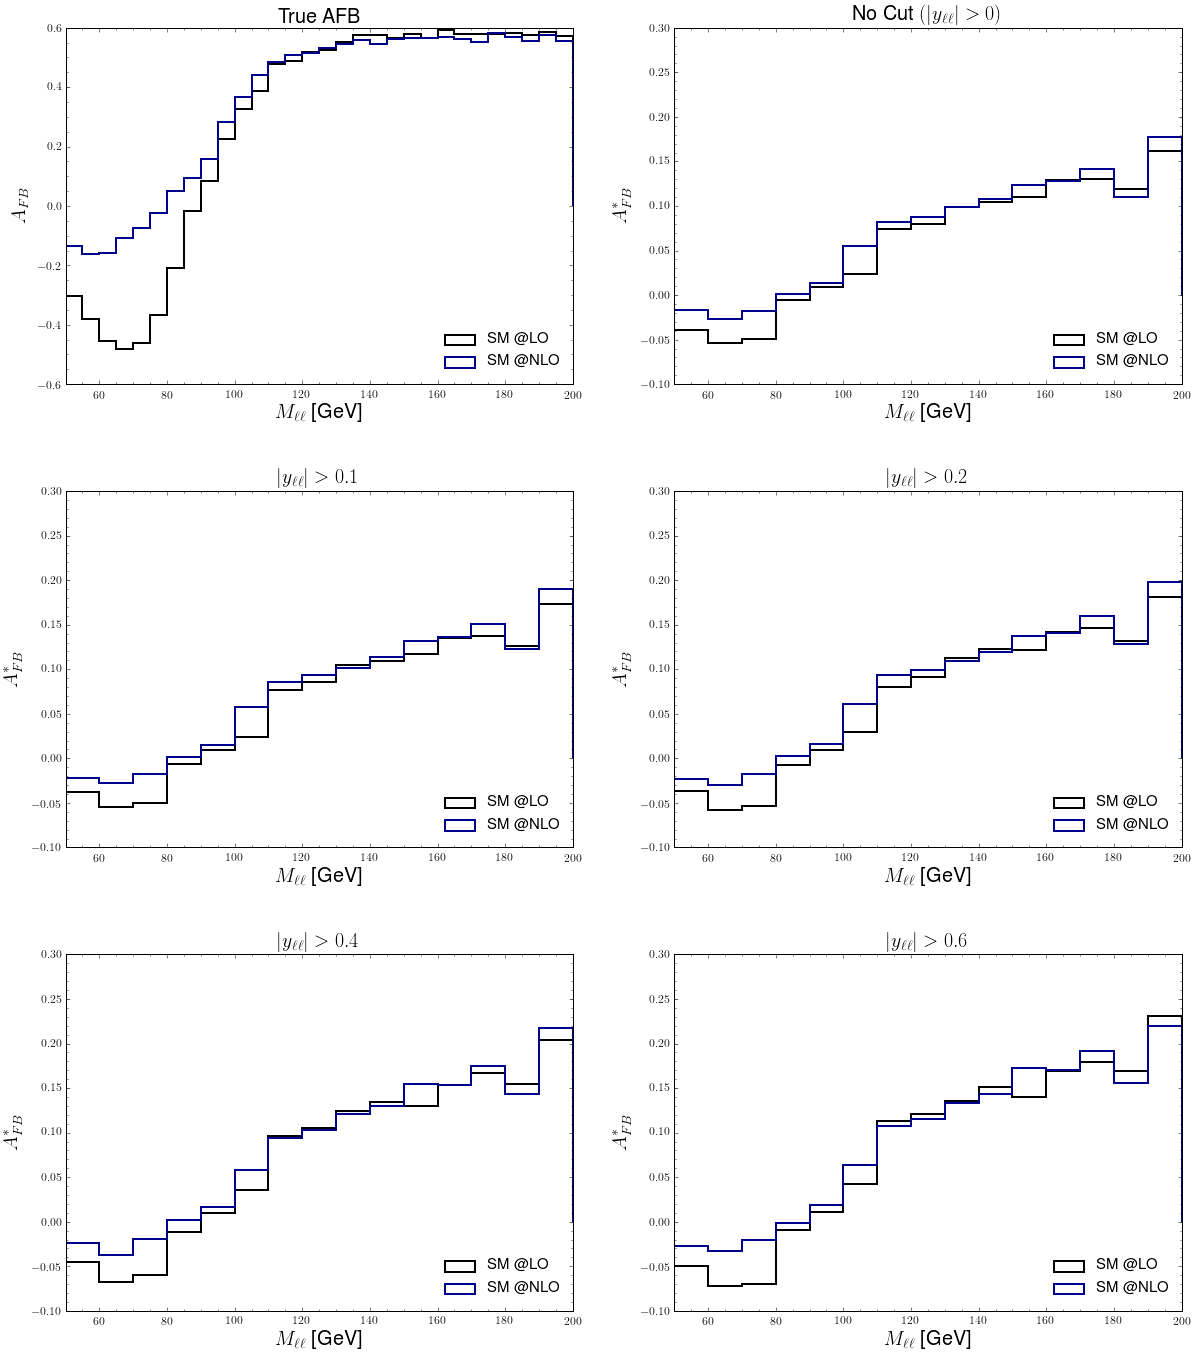

In [12]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
bins = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binMax)]

############ Plotting ##################################

ax1 = plt.subplot(3, 2, 1)
plt.title("True AFB", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_RapNo/np.where(SM_LO_AFBden_RapNo==0,1e-10,SM_LO_AFBden_RapNo), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_RapNo/np.where(SSM_LO_AFBden_RapNo==0,1e-10,SSM_LO_AFBden_RapNo), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)


ax2 = plt.subplot(3, 2, 2)
plt.title("No Cut $(|y_{\ell \ell}| > 0)$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins_Rap00,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap00/np.where(SM_LO_AFBden_Rap00==0,1e-10,SM_LO_AFBden_Rap00), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins_Rap00,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap00/np.where(SM_NLO_AFBden_Rap00==0,1e-10,SM_NLO_AFBden_Rap00), 
             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_Rap00/np.where(SSM_LO_AFBden_Rap00==0,1e-10,SSM_LO_AFBden_Rap00), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_Rap00/np.where(SSM_NLO_AFBden_Rap00==0,1e-10,SSM_NLO_AFBden_Rap00), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)


ax3 = plt.subplot(3, 2, 3)
plt.title("$|y_{\ell \ell}| > 0.1$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins_Rap00,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap01/np.where(SM_LO_AFBden_Rap01==0,1e-10,SM_LO_AFBden_Rap01), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins_Rap00,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap01/np.where(SM_NLO_AFBden_Rap01==0,1e-10,SM_NLO_AFBden_Rap01), 
             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_Rap01/np.where(SSM_LO_AFBden_Rap01==0,1e-10,SSM_LO_AFBden_Rap01), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_Rap01/np.where(SSM_NLO_AFBden_Rap01==0,1e-10,SSM_NLO_AFBden_Rap01), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)

ax4 = plt.subplot(3, 2, 4)
plt.title("$|y_{\ell \ell}| > 0.2$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins_Rap00,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap02/np.where(SM_LO_AFBden_Rap02==0,1e-10,SM_LO_AFBden_Rap02), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins_Rap00,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap02/np.where(SM_NLO_AFBden_Rap02==0,1e-10,SM_NLO_AFBden_Rap02), 
             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_Rap02/np.where(SSM_LO_AFBden_Rap02==0,1e-10,SSM_LO_AFBden_Rap02), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_Rap02/np.where(SSM_NLO_AFBden_Rap02==0,1e-10,SSM_NLO_AFBden_Rap02), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)

ax5 = plt.subplot(3, 2, 5)
plt.title("$|y_{\ell \ell}| > 0.4$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins_Rap00,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap04/np.where(SM_LO_AFBden_Rap04==0,1e-10,SM_LO_AFBden_Rap04), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins_Rap00,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap04/np.where(SM_NLO_AFBden_Rap04==0,1e-10,SM_NLO_AFBden_Rap04), 
             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_Rap04/np.where(SSM_LO_AFBden_Rap04==0,1e-10,SSM_LO_AFBden_Rap02), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_06'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_Rap06/np.where(SSM_NLO_AFBden_Rap06==0,1e-10,SSM_NLO_AFBden_Rap02), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)

ax6 = plt.subplot(3, 2, 6)
plt.title("$|y_{\ell \ell}| > 0.6$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_06'].binlabel,bins=bins_Rap00,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap06/np.where(SM_LO_AFBden_Rap06==0,1e-10,SM_LO_AFBden_Rap06), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_06'].binlabel,bins=bins_Rap00,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap06/np.where(SM_NLO_AFBden_Rap06==0,1e-10,SM_NLO_AFBden_Rap06), 
             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_Rap04/np.where(SSM_LO_AFBden_Rap04==0,1e-10,SSM_LO_AFBden_Rap02), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_06'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_Rap06/np.where(SSM_NLO_AFBden_Rap06==0,1e-10,SSM_NLO_AFBden_Rap02), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)

leg = ax1.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
ax1.set_ylim([-0.6,0.6])

leg = ax2.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
ax2.set_ylim([-0.1,0.3])

leg = ax3.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])
ax3.set_ylim([-0.1,0.3])

leg = ax4.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])
ax4.set_ylim([-0.1,0.3])

leg = ax5.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])
ax5.set_ylim([-0.1,0.3])

leg = ax6.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])
ax6.set_ylim([-0.1,0.3])

plt.subplots_adjust(top = 1.0, bottom=0.01, hspace=0.3, wspace=0.2)
plt.show()

NameError: name 'SSM_LO_AFBnum_RapNo' is not defined

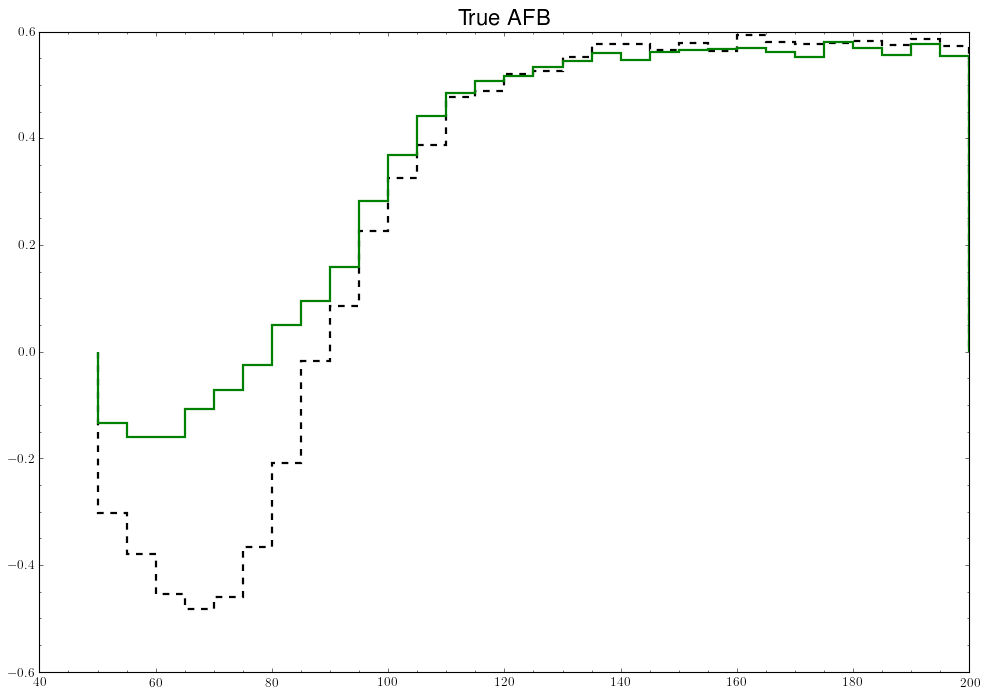

In [70]:
fig = plt.figure(1, figsize=(15, 10), facecolor='w', edgecolor='k')
bins = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binMax)]

############ Plotting ##################################

ax1 = plt.subplot()
plt.title("True AFB", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @LO (incoming particles: quarks)', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_RapNo/np.where(SM_LO_AFBden_RapNo==0,1e-10,SM_LO_AFBden_RapNo), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @NLO (incoming particles: quarks)', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @NLO (incoming particles: quarks + gluons)', histtype="step", rwidth=1.0,
             weights=SSM_LO_AFBnum_RapNo/np.where(SSM_LO_AFBden_RapNo==0,1e-10,SSM_LO_AFBden_RapNo), 
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)


leg = ax1.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
ax1.set_ylim([-0.5,0.65])


plt.subplots_adjust(top = 1.0, bottom=0.01, hspace=0.3, wspace=0.2)
plt.show()